In [2]:
#데이터 가져오기
import pandas as pd
import numpy as np

path = "/content/vgames2.csv"
df = pd.read_csv(path)
df.drop(df.columns[0],axis = 1,inplace = True)
display(df)
display(df.info())
pd.set_option('display.max_rows', 100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


None

In [3]:
#열 데이터를 분류하고 결측치 여부를 출력하는 함수
def displaySerCnt (ser) :
  display(ser.value_counts(), ser.isna().value_counts())
  return None

In [4]:
#Year 항목
display(df[df['Year'].isna() == True])
#4자리가 아닌 년도를 정리하는 함수
def yearsFour(x) :
  if x is None :
    return None
  else :
    if x/1000 >= 1 :
      return x
    else :
      if x > 22 :
        return x+1900
      else : 
        return x+2000

df['Year'] = df['Year'].apply(yearsFour)
displaySerCnt(df['Year'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

False    16327
True       271
Name: Year, dtype: int64

In [5]:
#Platform 항목
displaySerCnt(df['Platform'])

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

False    16598
Name: Platform, dtype: int64

In [6]:
#Genre 항목
displaySerCnt(df['Genre'])

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

False    16548
True        50
Name: Genre, dtype: int64

In [7]:
#Publisher 항목
displaySerCnt(df['Publisher'])

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

False    16540
True        58
Name: Publisher, dtype: int64

In [8]:
#판매량 정리하기
#Melt를 이용하여 각 지역별 판매량을 2열로 정리 및 0 값을 결측치로서 제거하기(판매하지 않음)
df1 = pd.DataFrame(df)
df1.columns = ['Name', 'Platform','Year','Genre','Publisher','NA','EU','JP','Other']
df1.NA = df1.NA.replace('0','-')
df1.EU = df1.EU.replace('0','-')
df1.JP = df1.JP.replace('0','-')
df1.Other = df1.Other.replace('0','-')

dfMelt = pd.melt(df1, id_vars=['Name', 'Platform','Year','Genre','Publisher'], var_name='SaleCountry', value_name='Sales')
dfMelt.drop(dfMelt[dfMelt.Sales == '-'].index,inplace = True)
dfMelt.reset_index(inplace = True)
dfMelt.drop(dfMelt.columns[0],axis = 1, inplace = True)

#value(판매량)를 str->float으로 전환 / 불필요한 문자(K또는M)를 제거 후 단위 맞추기(기본단위 : M)
def StrToNum (value) :
  try : 
    return float(value)
  except : 
    for i in range(len(value)) :
      if value[i] == 'K' :
        return float(value.replace('K',''))/1000
      elif value[i] == 'M' :
        return float(value.replace('M',''))

dfMelt.Sales = dfMelt.Sales.apply(StrToNum)
displaySerCnt(dfMelt.SaleCountry)
displaySerCnt(dfMelt.Sales)

NA       12155
EU       10933
Other    10212
JP        6265
Name: SaleCountry, dtype: int64

False    39565
Name: SaleCountry, dtype: int64

0.01     6186
0.02     4129
0.03     2934
0.04     2336
0.05     1885
         ... 
26.93       1
5.57        1
9.81        1
3.74        1
10.57       1
Name: Sales, Length: 495, dtype: int64

False    39565
Name: Sales, dtype: int64

In [9]:
dfMelt

,Name,Platform,Year,Genre,Publisher,SaleCountry,Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,NA,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,NA,0.17
2,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,NA,0.04
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,NA,0.12
4,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,NA,0.02
...,...,...,...,...,...,...,...
39560,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,Other,0.08
39561,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,Other,0.01
39562,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,Other,0.13
39563,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,Other,0.03


['Action', 'Sports', 'Misc', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Adventure', 'Fighting', 'Simulation', 'Strategy', 'Puzzle']


,Genre,SaleCountry,Sales
0,Action,NA,0.04
1,Action,NA,0.17
2,Misc,NA,0.04
3,Platform,NA,0.12
4,Simulation,NA,0.02
...,...,...,...
35248,Sports,Other,0.08
35249,Platform,Other,0.01
35250,Sports,Other,0.13
35251,Action,Other,0.03


Country : 
                               df      sum_sq  ...            F         PR(>F)
C(SaleCountry)               3.0  110.582950  ...  2335.029515   0.000000e+00
C(Genre)                    11.0   15.500922  ...    89.266867  1.087130e-200
C(SaleCountry):C(Genre)     33.0   19.279161  ...    37.008344  3.538720e-231
Residual                 35205.0  555.749257  ...          NaN            NaN

[4 rows x 5 columns] 



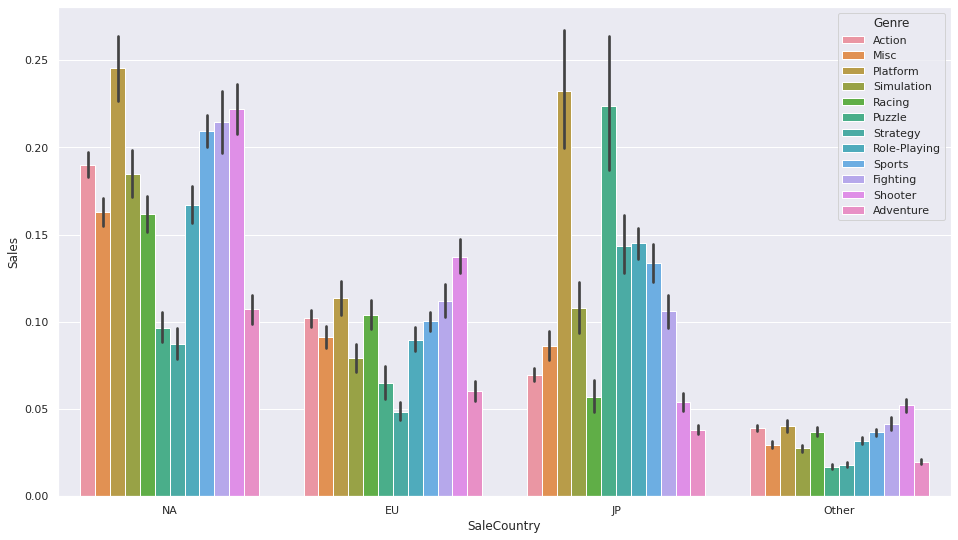

In [157]:
#1.지역별 선호 장르가 다른가?

# 장르/판매지역 별로 판매량을 확인

dfCountry = pd.DataFrame(dfMelt[['Genre','SaleCountry','Sales']])
dfCountry = dfCountry.drop(dfCountry[dfCountry['Genre'].isna()].index).reset_index().drop('index',axis = 1)


#이상치 제거하기

#데이터를 입력받으면 데이터의 이상치 행을 반환하는 함수
def outliersIQR (data) :
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3-q1
  low = q1 - (iqr*1.5)
  up = q3 + (iqr*1.5)
  return np.where((data > up)|(data < low))

#이상치인 행 번호와 행 전체 길이를 입력받으면 정상 데이터 행 번호 리스트를 반환하는 함수
def NotOutlier (outlier,indexLength) :
  NotOutlierList = []
  for i in range(indexLength) :
    if i not in outlier :
      NotOutlierList.append(i)
  return NotOutlierList

#각 국가별 이상치 찾기
dfC1 = dfCountry.reset_index()
CountryList = list(dfC1['SaleCountry'].value_counts().reset_index().iloc[:,0])
GenreList = list(dfC1['Genre'].value_counts().reset_index().iloc[:,0])
print(GenreList)

#이상치 리스트 만들기
outlierList = np.array([])
for i in CountryList :
  for j in GenreList :
    outlierList = np.concatenate((outlierList,
                                  dfC1.loc[dfC1[(dfC1['SaleCountry'] == i)&(dfC1['Genre'] == j)].reset_index().drop('level_0',axis = 1).loc[outliersIQR(dfC1[(dfC1['SaleCountry'] == i)&(dfC1['Genre'] == j)]['Sales'])[0],'index'],'index']
                                  ),
                                 axis = None
                                 )

#이상치를 제거한 데이터프레임 생성
dfC1 = dfC1.loc[NotOutlier(np.sort(outlierList),len(dfC1['index']))].drop('index',axis = 1).reset_index().drop('index',axis = 1)

display(dfC1)

# 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize' : (16,9)})
sns.barplot(x = 'SaleCountry',y = 'Sales',hue = 'Genre',data = dfC1)

# ANOVA 분석 진행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('Sales ~ C(SaleCountry) * C(Genre)', dfC1).fit()

print("Country : \n",anova_lm(model1),"\n")


ANOVA 분석(이원분산분석 - 변수:지역/장르)의 결과를 통해 실제 판매지역과 장르에 따라 판매량이 차이를 보인다고 할 수 있다.

--------------------------------------------------------------

지역별 선호 장르를 알아보기 위해 barplot을 이용하여 나타내었다.

미국(NA)의 경우 플랫폼 게임의 판매량이 높게 나타난다. 

유럽(EU)의 경우 슈팅 게임의 판매량이 높게 나타나지만, 장르별로 큰 차이를 보이지는 않는다.

일본(JP)의 경우 플랫폼게임이 가장 많이 판매되며, 다음으로 퍼즐 게임이 잘 팔린다고 이야기 할 수 있다. 

이외 지역에서의 판매량은 큰 차이가 나지 않는다고 볼 수 있으며 슈팅 게임이 판매량이 가장 높다고 볼 수 있다.

,Year,Genre,Sales
0,2008,Action,0.04
1,2009,Action,0.17
2,2010,Misc,0.04
3,2010,Platform,0.12
4,2011,Simulation,0.02
...,...,...,...
34664,2004,Sports,0.08
34665,2006,Platform,0.01
34666,2015,Sports,0.13
34667,2013,Action,0.03


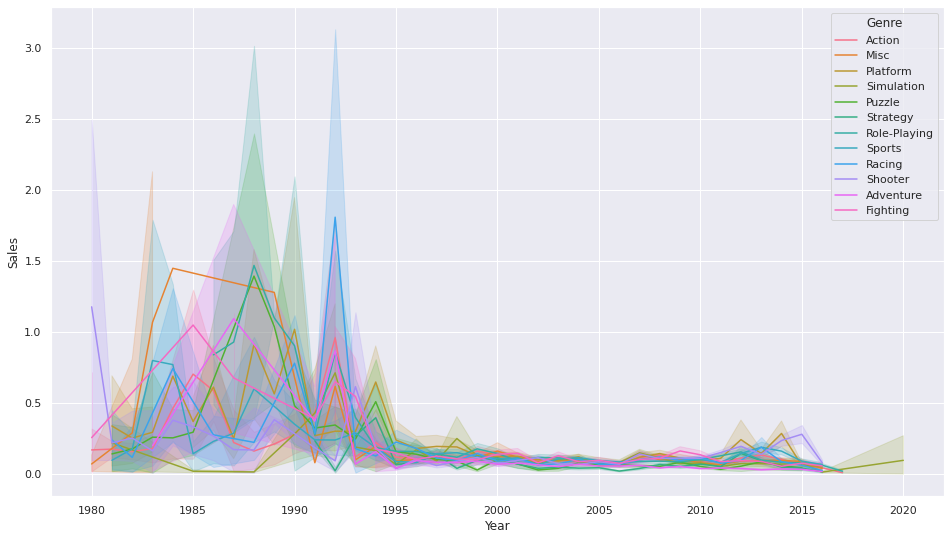

In [158]:
#2. 연도별 게임 트렌드가 있는가?

#년도별 장르 확인

#새로운 데이터프레임 생성 및 정리
dfYear = pd.DataFrame(dfMelt[['Year','Genre','Sales']])
dfYear = dfYear.dropna().reset_index().drop('index',axis = 1)

#년도 데이터의 형태를 Int형으로 수정하는 함수
def FloatToInt (x) : 
  return int(x)

dfYear['Year'] = dfYear['Year'].apply(FloatToInt)

#이상치 제거하기
dfY1 = dfYear.reset_index()
YearList = list(dfY1['Year'].value_counts().reset_index().iloc[:,0])
GenreList = list(dfY1['Genre'].value_counts().reset_index().iloc[:,0])
outlierList = np.array([])
for i in YearList :
  for j in GenreList :
    if len(dfY1[(dfY1['Year'] == i)&(dfY1['Genre'] == j)]['Sales']) > 0 :
      outlierList = np.concatenate((outlierList,
                                    dfY1[(dfY1['Year'] == i)&(dfY1['Genre'] == j)].reset_index().drop('level_0',axis = 1).loc[outliersIQR(dfY1[(dfY1['Year'] == i)&(dfY1['Genre'] == j)]['Sales'])[0],'index']
                                    ),
                                   axis = None
                                   )
dfY1 = dfY1.loc[NotOutlier(outlierList,len(dfY1['index']))].drop('index',axis = 1).reset_index().drop('index',axis = 1)
display(dfY1)

#년도/장르별 경향 그래프로 보기
sns.set(rc = {'figure.figsize' : (16,9)})
sns.lineplot(x = 'Year',y = 'Sales',hue = 'Genre',data = dfY1)

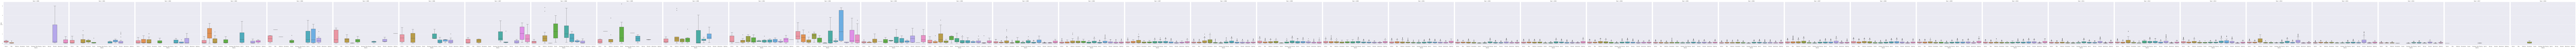

In [164]:
#catplot을 이용하여 년도별로 그래프 보기

sns.catplot(x="Genre", y = "Sales",col="Year",col_wrap=40,
            data=dfY1,
            kind = 'box' ,height=8, aspect=12/9)

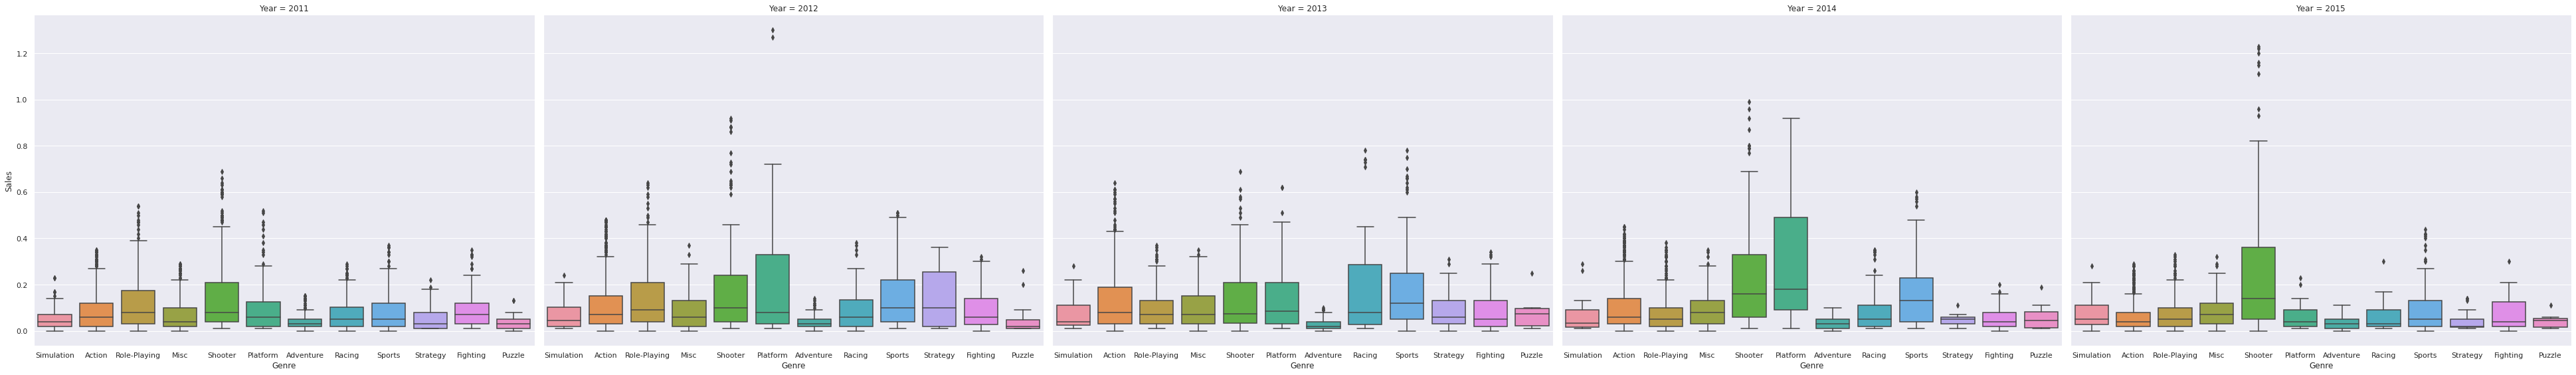

In [163]:
#2011~2015의 데이터만 보기(년도별)
dfYears = dfY1[(dfY1['Year'] >= 2011)&(dfY1['Year'] < 2016)]
sns.catplot(x="Genre", y = "Sales",col="Year",col_wrap=40,
            data=dfYears,
            kind = 'box' ,height=8, aspect=12/9)

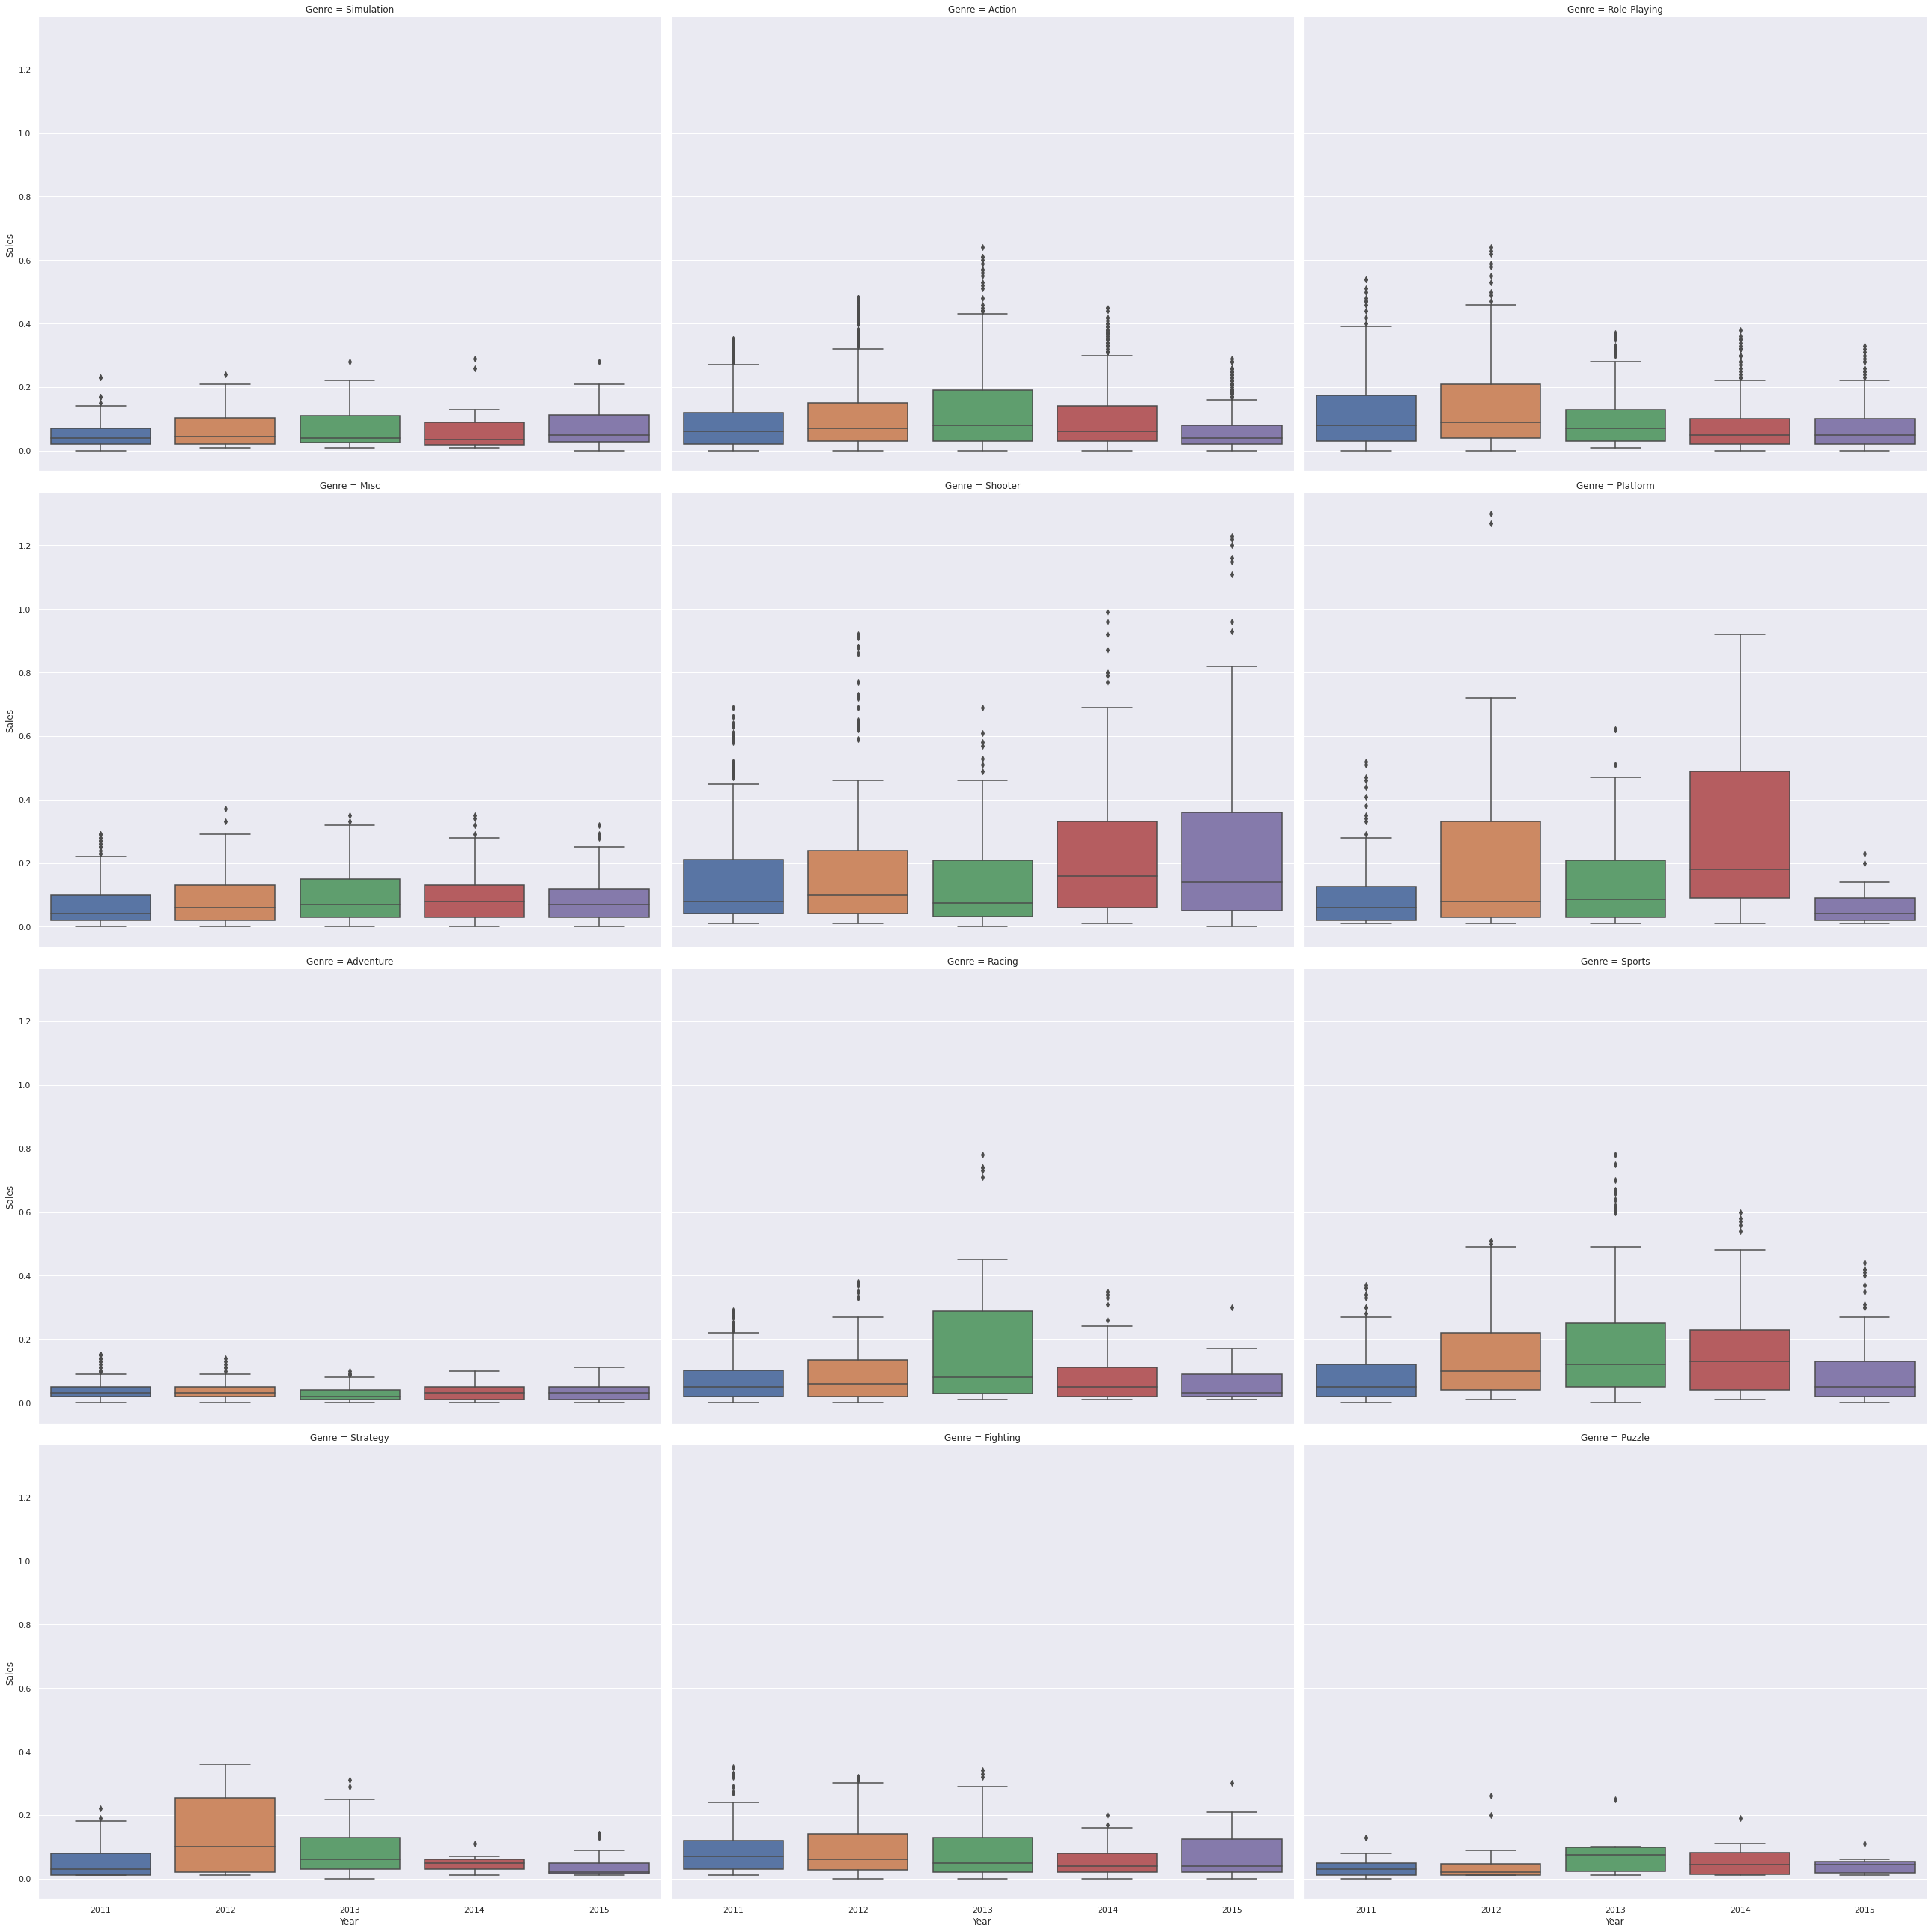

In [167]:
#장르별로 분류하여 보기
sns.catplot(x="Year", y = "Sales",col="Genre",col_wrap=3,
            data=dfYears,
            kind = 'box' ,height=9, aspect=12/9)

In [166]:
#ANOVA Test
model2 = ols('Sales ~ C(Year) * C(Genre)', dfYears).fit()

print("Year : (2011~2015)\n",anova_lm(model2),"\n")


Year : (2011~2015)
                       df      sum_sq   mean_sq          F         PR(>F)
C(Year)              4.0    2.274566  0.568642  40.328898   1.766227e-33
C(Genre)            11.0    9.896677  0.899698  63.807905  8.028723e-137
C(Year):C(Genre)    44.0    5.570728  0.126607   8.979187   3.227219e-56
Residual          7458.0  105.158551  0.014100        NaN            NaN 



ANOVA Test를 통해 연도/장르에 따른 판매량에 유의미한 차이가 있을 것이라 말할 수 있음. 

2000년도 이전 데이터와 2000년도 이후 데이터의 종류 및 규모에 차이가 심하며, 2010년도 이전 데이터는 최근의 경향을 살펴보는데 크게 의미가 없을것으로 판단되며, 2016년 이후는 데이터가 적어 정확한 판단을 내리는 것에 도움이 되지 않을거라 판단되어 최종적으로 2011~2015년의 데이터를 이용하여 그래프로 나타내었음.



In [15]:
model3 = ols('Sales ~ C(Year) * C(Genre)', dfYears).fit()

print("Year(2011~2015) : \n",anova_lm(model3),"\n")

Year(2011~2015) : 
                       df      sum_sq   mean_sq          F         PR(>F)
C(Year)              4.0    2.274566  0.568642  40.328898   1.766227e-33
C(Genre)            11.0    9.896677  0.899698  63.807905  8.028723e-137
C(Year):C(Genre)    44.0    5.570728  0.126607   8.979187   3.227219e-56
Residual          7458.0  105.158551  0.014100        NaN            NaN 



각 장르별 2011~2015년 판매량 데이터를 살펴보았음. 그래프에서 평균적으로 높은 판매량을 보이고 있는 것은 슈팅 게임과 플랫폼 게임임을 알 수 있음.

이 자료를 통해 각 장르의 연도별 판매량 변화를 볼 수 있었고, 이를 통해 다음 분기에 설계할 게임 장르 선정에 도움을 줄 수 있음.

추천하는 장르 : 슈팅 게임, 플랫폼 게임

In [143]:
dfPlatform = pd.DataFrame(dfMelt[['Year','Platform','Sales']])
dfPlatform = dfPlatform.dropna().reset_index().drop('index',axis = 1)

dfPlatform['Year'] = dfPlatform['Year'].apply(FloatToInt)
#display(dfPlatform)

#dfP2 : 연도/플랫폼별 순위 매긴 데이터프레임
dfP2 = pd.DataFrame(dfP1.groupby(['Year','Platform'])['Platform'].size()).rename(columns = {'Platform':'value'}).reset_index()
dfP2['Rank'] = dfP2.groupby(['Year'])['value'].rank(method = 'min',ascending = False)
dfP2 = dfP2[['Year','Platform','Rank']]

#dfP3 : 위의 두 데이터프레임을 merge하여 순위 5 이상의 데이터만 남긴 데이터프레임
dfP3 = pd.merge(dfPlatform,dfP2)[pd.merge(dfPlatform,dfP2)['Rank'] <= 5].reset_index().drop(['index','Rank'],axis = 1)

#이상치 제거하기
#dfP1 : 이상치 제거한 데이터프레임
dfP1 = dfP3.reset_index()
def GetOutlierList (grp) :
  return np.concatenate(list(grp.apply(lambda x:outliersIQR(x['Sales'])).apply(np.array)+
                             np.array(grp.count()['index']).cumsum()
                             ),axis = None)

dfP1 = dfP1.loc[NotOutlier(GetOutlierList(dfP1.groupby(['Year','Platform'])),len(dfP1['index']))].drop('index',axis = 1).reset_index().drop('index',axis = 1)
display(dfP1)

,Year,Platform,Sales
0,2008,DS,0.04
1,2008,DS,0.04
2,2008,DS,0.47
3,2008,DS,0.18
4,2008,DS,0.19
...,...,...,...
30916,2017,PSV,0.01
30917,2017,PSV,0.01
30918,1995,NG,0.20
30919,1995,NG,0.02


,Year,Platform,Sales
2675,2011,PC,0.15
2676,2011,PC,0.03
2677,2011,PC,0.02
2678,2011,PC,0.07
2679,2011,PC,0.12
...,...,...,...
30397,2015,PSV,0.00
30398,2015,PSV,0.01
30399,2015,PSV,0.07
30400,2015,PSV,0.01


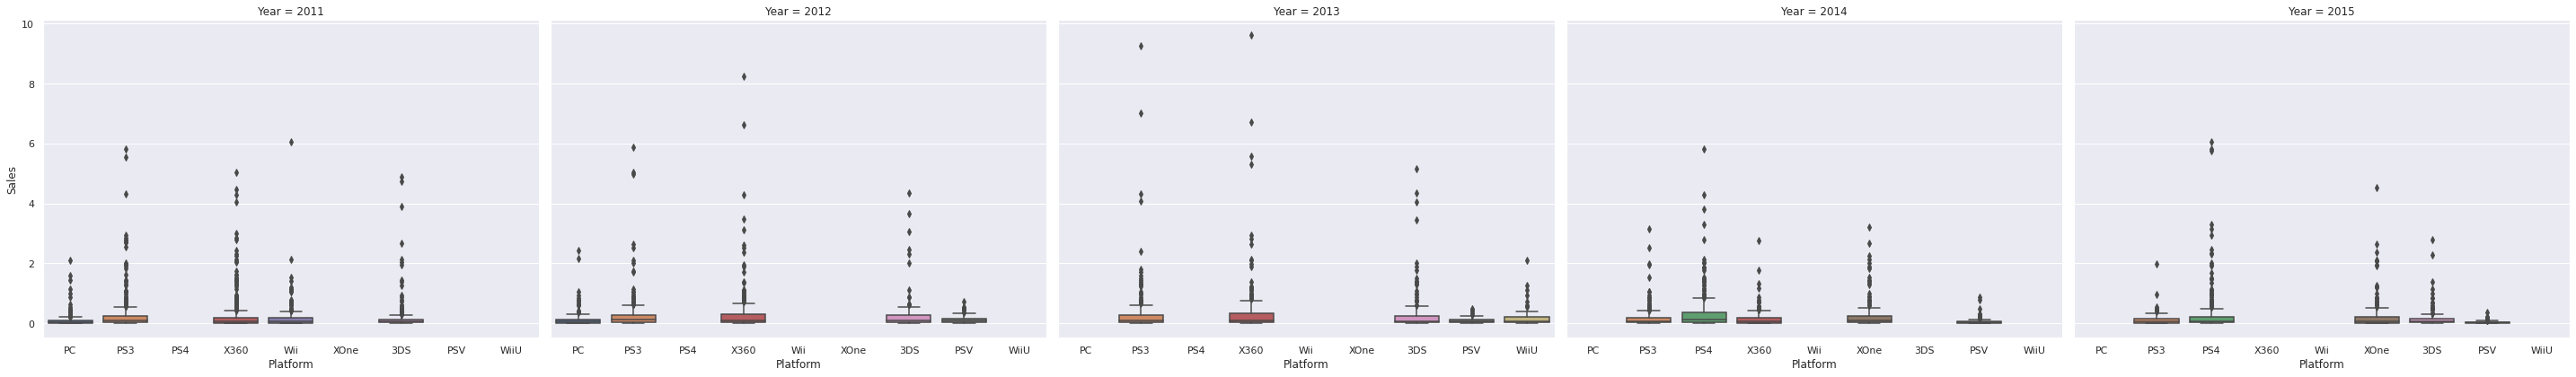

In [144]:
dfPlat = dfP1.loc[(dfP1['Year']>=2011)&(dfP1['Year']<2016)]
display(dfPlat)

sns.catplot(x="Platform", y = "Sales",col="Year",col_wrap=5,
            data=dfPlat,
            kind = 'box' ,height=6, aspect=12/9)


2011~2015년도 데이터를 이용하여 년도별 Rank 5 게임 플랫폼을 그래프로 나타내었다.

이 그래프들을 살펴보면, 시간이 지날수록 PC 비디오 게임(콘솔 게임)의 판매량이 적어지는 것을 볼 수 있다. 

PS(플레이스테이션) 시리즈는 11년도에 PS3(2006년 발매 기기) 게임이 많이 판매되었음을 알 수 있고, 이후 PSV(플레이스테이션 vita) 및 PS4가 발매되며 게임 판매 기기가 변경됨을 알 수 있다. 

Xbox 시리즈는 2011년 기준 X360의 게임의 판매량이 높았고, 이후 XOne 기기의 발매로 게임 판매량이 옮겨지는 양상을 볼 수 있다. 

Nintendo 시리즈를 보면, 2011년 3DS(개인 휴대용 게임기) 기기의 게임 및 Wii(가족용 게임기) 게임의 판매량이 높고, Wii 게임은 이후 WiiU의 발매로 게임 판매량이 옮겨가는 것을 볼 수 있다. 3DS는 4DS로 세대가 옮겨졌지만, 이후 시장에서 경쟁력이 낮아져 순위에세 찾아보기 어려운 것을 볼 수 있다.

2022년 현재
플레이스테이션 시리즈에서는 PS5가 최신 기기이다. 게임기 성능에서 PS5가 여타 게임기보다 뛰어나다는 평가를 받고 있다.

Xbox 시리즈에서는 Xbox Series S가 최신 기기이고 개발사 Microsoft가 게임 클라우드 서비스 및 모바일 서비스, PC와의 연동 등 멀티플랫폼 서비스를 개발/지원한다.

Nintendo 시리즈에서는 기존 휴대용/가족용으로 나뉜 게임 기기들을 통합한 시리즈 Nintendo Switch 를 개발하여 판매중이다. 넓은 연령층이 타겟이라는 장점이 있다.

그래프상에서 PC 비디오게임 시장은 축소되는듯 보이지만, 실제 2022년에는 게임기 대상으로 개발/발매 후 좋은 성적을 거두면 PC로 전환하여 따로 발매하는 경향이 있다.